<img align=center src="https://afouda-datascience.com/wp-content/uploads/2020/12/afoudalogo.png"></img>
<h1 align=center>FEATURE ENGINEERING AVEC PYTHON</h1>

 Par [Josué AFOUDA](https://afouda-datascience.com/)

Si vous êtes déjà familier avec l'Apprentissage Automatique (*Machine Learning*), alors vous savez que l'Ingénierie des Fonctionnalités (***Feature Engineering*** en Anglais) est un ingrédient très important pour des modèles de prédictions hautement performants. 

***Feature Engineering*** (Ingénierie des fonctionnalités) est le processus de transformation des variables brutes pour créer de nouvelles variables. C'est l'une des plus importantes étapes qui influence un modèle de *Machine Learning*. Il y a deux principaux types de *Feature Ingineering* :

- Transformation des variables brutes et/ou création de nouvelles variables sous la base des connaissances sur la problématique *business* ;

- Transformation des variables brutes et/ou création de nouvelles variables dans une perspective statistique (par exemple normalisation ou standardisation des données).

L'objectif de l'ingénierie des fonctionnalités est de produire plus d'information, c'est-à-dire créer de nouvelles variables, pour l'entraînement des algorithmes de Machine Learning. Le fait d'ajouter plus d'information permet très souvent d'améliorer les résultats des modèles. En effet si les ensembles de données sont icomplets ou qu'ils manquent d'importantes variables alors les modèles ne permettront pas d'avoir une bonne compréhension de la problématique en question et peuvent même conduire à de fausses prédictions. C'est pourquoi en tant que Data Scientist, vous devez toujours penser à l'ajout de nouvelles informations pour enrichir votre ensemble de données et par conséquent construire des modèles beaucoup plus précis.

La création du meilleur ensemble de fonctionnalités dépend en grande partie de la compréhension du domaine et des intuitions dérivées des données pendant la phase d'analyse exploratoire des données. Il y a beaucoup de créativité dans la création et la transformation de fonctionnalités, et par conséquent, l'ingénierie des fonctionnalités peut être considérée à la fois comme un art et une science.

A travers ce tutoriel, vous apprendrez à créer de nouvelles variables en utilisant 04 techniques majeures.

# <font color=red> Fusion de plusieurs sources de données

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Données de l'office australien des impôts
df_impots = pd.read_csv('taxstats2015.csv')
df_impots.head()

,Postcode,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Count salary and wages,Average salary and wages,Median salary and wages,Count net rent,Average net rent,Median net rent,...,Median total business income,Count total business expenses,Average total business expenses,Median total business expenses,Count net tax,Average net tax,Median net tax,Count super total accounts balance,Average super total accounts balance,Median super total accounts balance
0,2000,36185,47723,18213,31293,38710,17992,3614,558,207,...,19684,1331,222191,20773,17264,27555,5917,51394,68531,1110
1,2006,83,80905,58150,74,82733,67658,21,1042,-807,...,42054,4,48971,18508,67,28142,19359,137,90315,15544
2,2007,4769,46549,31474,4153,47386,34366,548,-1242,-794,...,19960,334,639499,9233,3071,15649,9115,6711,41670,5225
3,2008,5607,108816,41151,5008,53418,42892,612,1818,-1728,...,19722,481,32173,9385,4061,53976,10583,7676,54245,10373
4,2009,9726,82938,50604,8167,74068,55243,1714,-2412,-1520,...,26044,666,222993,11982,7358,32430,14835,12718,126486,20494


In [3]:
df_impots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Postcode                              2473 non-null   int64
 1   Count taxable income or loss          2473 non-null   int64
 2   Average taxable income or loss        2473 non-null   int64
 3   Median taxable income or loss         2473 non-null   int64
 4   Count salary and wages                2473 non-null   int64
 5   Average salary and wages              2473 non-null   int64
 6   Median salary and wages               2473 non-null   int64
 7   Count net rent                        2473 non-null   int64
 8   Average net rent                      2473 non-null   int64
 9   Median net rent                       2473 non-null   int64
 10  Count total income or loss            2473 non-null   int64
 11  Average total income or loss          2473 

In [4]:
# Nombre de valeurs unique de la variable 'Postcode'
df_impots.Postcode.nunique()

2473

Etant donné que la variable *Postcode* comporte 2473 valeurs uniques et que la dataframe *df* a aussi 2473 lignes, alors la varibale *Postcode* identifie de manière unique chaque observation de *df*.

In [5]:
# Codes postaux
postcode_df = pd.read_excel(
    'taxstats2016_individual06B_postcode.xlsx', 
    sheet_name = 'Individuals Table 6B', 
    header = 2
)

postcode_df.head()

,State/ Territory1,Postcode,Number of individuals\nno.,Taxable income or loss3 \nno.,Taxable income or loss3 \n$,Tax on taxable income \nno.,Tax on taxable income \n$,Medicare levy \nno.,Medicare levy \n$,Medicare levy surcharge \nno.,...,Small business income tax offset \n$,Low income tax offset \nno.,Low income tax offset \n$,People with private health insurance \nno.,Private health insurance - your Australian Government rebate received \nno.,Private health insurance - your Australian Government rebate received \n$,Private health insurance rebate \nno.,Private health insurance rebate \n$,Excess private health reduction or refund (rebate reduced) \nno.,Excess private health reduction or refund (rebate reduced) \n$
0,ACT,2600,5581,5557,569612119,4905,163820305,4384,10548612,119,...,125198,1812,527925,4597,3557,2662024,440,185991,1663,854227
1,ACT,2601,2658,2637,183288078,1941,46542933,1660,3203840,88,...,30823,812,250431,1637,1141,630696,213,63883,481,173475
2,ACT,2602,19457,19367,1379212924,16595,326786223,14594,24937105,565,...,212891,7623,2306744,13434,10610,6369968,1461,474942,3812,1381661
3,ACT,2603,6478,6439,796053195,5701,249451322,5176,15002971,131,...,149987,2056,611022,5193,3913,2761608,442,154634,1849,1004593
4,ACT,2604,7387,7341,637350002,6534,165676071,5787,11512325,248,...,73942,2391,673244,5465,4356,2632078,552,175697,1885,754097


In [6]:
postcode_df.shape

(2567, 150)

In [7]:
# Nombre de valeurs unique de la variable 'Postcode'
postcode_df['Postcode'].nunique()

2567

La variable *Postcode* de la datframe *postcode_df* identifie de manière unique chaque ligne. Par ailleurs, si nous la fusionnons à la dataframe *df_impots*, nous obtiendrons plus d'informations concernant chaque code postal.

In [8]:
# Jointure à gauche de df_impots à postcode_df
merge_df = pd.merge(
    df_impots, 
    postcode_df, 
    how = 'left', 
    on = 'Postcode'
)

merge_df.head(10)

,Postcode,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Count salary and wages,Average salary and wages,Median salary and wages,Count net rent,Average net rent,Median net rent,...,Small business income tax offset \n$,Low income tax offset \nno.,Low income tax offset \n$,People with private health insurance \nno.,Private health insurance - your Australian Government rebate received \nno.,Private health insurance - your Australian Government rebate received \n$,Private health insurance rebate \nno.,Private health insurance rebate \n$,Excess private health reduction or refund (rebate reduced) \nno.,Excess private health reduction or refund (rebate reduced) \n$
0,2000,36185,47723,18213,31293,38710,17992,3614,558,207,...,273962.0,10143.0,3466009.0,7710.0,5875.0,3815543.0,984.0,234746.0,2358.0,1248220.0
1,2006,83,80905,58150,74,82733,67658,21,1042,-807,...,396.0,26.0,7825.0,53.0,37.0,25403.0,7.0,1694.0,18.0,10150.0
2,2007,4769,46549,31474,4153,47386,34366,548,-1242,-794,...,31587.0,2200.0,716233.0,1763.0,1394.0,744748.0,227.0,45656.0,453.0,167480.0
3,2008,5607,108816,41151,5008,53418,42892,612,1818,-1728,...,71139.0,2690.0,854648.0,2678.0,2019.0,1044569.0,398.0,85465.0,667.0,226170.0
4,2009,9726,82938,50604,8167,74068,55243,1714,-2412,-1520,...,114828.0,3739.0,1146253.0,5628.0,4415.0,2779136.0,768.0,207962.0,1864.0,887040.0
5,2010,20287,79838,53444,17554,73680,56091,2876,-877,-1096,...,305451.0,8412.0,2559863.0,11789.0,9115.0,4935387.0,1670.0,401064.0,3939.0,1597489.0
6,2011,14945,85971,55019,12444,74984,56944,2232,209,-746,...,261506.0,5838.0,1764846.0,8926.0,7214.0,4502793.0,1102.0,288138.0,3162.0,1415049.0
7,2015,7254,72810,60610,6471,73234,64324,1161,-2555,-2237,...,119395.0,3101.0,892958.0,4927.0,4105.0,2187601.0,572.0,146548.0,1615.0,565909.0
8,2016,8281,68611,52731,7227,66146,55890,1163,-1335,-927,...,130549.0,3803.0,1150115.0,4955.0,3997.0,2167997.0,648.0,160952.0,1540.0,559162.0
9,2017,12727,62869,53468,11306,65256,57934,1755,-5038,-3687,...,146271.0,6096.0,1804162.0,7594.0,6270.0,3195269.0,1046.0,208202.0,2183.0,711846.0


In [9]:
merge_df.shape

(2473, 177)

La jointure à gauche permet de conserver toutes les observations dans la première table (ou table de gauche) qu'elles apparaissent ou non dans la deuxième table (ou table de droite). Il est donc normal que la dataframe *merge_df* compte 2473 lignes tout comme *df*. De plus, nous avons maintenant 177 variables : 150 colonnes pour *postcode_df* + 28 colonnes pour *df* - 1 colonne commune (colonne 'Poscode').

Nous sommes passés de 28 variables à 177 variables ce qui est forcément intéressant pour une analyse des données pour en tirer d'informations utiles.

# <font color=red> Création de nouvelles variables à partir des variables existantes

In [10]:
# Importation des données d'une société de commerce en ligne
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
# Pays
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Nous pouvons créer une colonne nommée *Region* qui regroupe plusieurs pays de la même région ou du même continent.

In [13]:
# Regroupement des pays
pays_asiatiques = ['Japan', 'Hong Kong', 'Singapore']
pays_du_moyen_orient = ['Israel', 'Bahrain', 'Lebanon', 'United Arab Emirates', 'SaudiArabia']
pays_en_amerique = ['Canada', 'Brazil', 'USA']
pays_europeens = ['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany', 
                  'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal', 
                  'Italy', 'Belgium', 'Lithuania', 'Iceland', 'Denmark', 'Sweden', 
                  'Finland', 'Greece', 'Czech Republic']

In [14]:
# Création de la colonne 'Region'
df['Region'] = df['Country']
df.loc[df['Country'].isin(pays_asiatiques), 'Region'] = 'Asie'
df.loc[df['Country'].isin(pays_du_moyen_orient), 'Region'] = 'Moyen-Orient'
df.loc[df['Country'].isin(pays_en_amerique), 'Region'] = 'Amerique'
df.loc[df['Country'].isin(pays_europeens), 'Region'] = 'Europe'

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Region
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Europe
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Europe
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe


In [16]:
df.Region.unique()

array(['Europe', 'Asie', 'Channel Islands', 'Cyprus', 'Austria',
       'Moyen-Orient', 'Saudi Arabia', 'Amerique', 'Unspecified',
       'European Community', 'Malta', 'RSA'], dtype=object)

# <font color=red> Manipulation des dates

Il n'est pas rare de travailler avec des jeux de données ayant une ou plusieurs variables contenant des dates. Vous pouvez créer de nouvelles variables comme par exemple le mois de l'année et le jour de la semaine à partir de ce type de variable.

Dans la dataframe *df*, la colonne *InvoiceDate* indique la date et le temps et est stcokée sous format datetime. A partir de cette variable, nous pouvons en créer plusieurs autres variables.

In [17]:
# Extraction de l'année
df['Year'] = df['InvoiceDate'].dt.year

# Extraction du jour de la semaine (0 correspond à Lundi)
df['Day Of Week'] = df['InvoiceDate'].dt.dayofweek

# Extraction du mois
df['Month'] = df['InvoiceDate'].dt.month

# Extraction du jour du mois
df['Day'] = df['InvoiceDate'].dt.day

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Region,Year,Day Of Week,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Europe,2010,2,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe,2010,2,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Europe,2010,2,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe,2010,2,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe,2010,2,12,1


In [19]:
df['Day Of Week'].unique()

array([2, 3, 4, 6, 0, 1], dtype=int64)

Dans la variable représentant le jour de la semaine, 0 correspond au Lundi et 6 correspond donc au Dimanche. A partir de cette variable, nous pouvons encore créer une autre variable indiquant s'il s'agit d'un jour du week-end ou pas. Le week-end étant composé de Samedi et Dimanche.

In [20]:
# Est-ce un jour de week-end ou pas
df['Is Weekend'] = df['Day Of Week'] >= 5

In [21]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Region,Year,Day Of Week,Month,Day,Is Weekend
225330,556671,23301,GARDENERS KNEELING PAD KEEP CALM,5,2011-06-13 16:33:00,1.65,17841.0,United Kingdom,Europe,2011,0,6,13,False
278375,561209,85163B,BLACK BAROQUE WALL CLOCK,1,2011-07-25 16:57:00,24.96,NaN,United Kingdom,Europe,2011,0,7,25,False
429256,573551,23332,IVORY WICKER HEART LARGE,6,2011-10-31 13:35:00,1.65,15044.0,United Kingdom,Europe,2011,0,10,31,False
86774,543598,48138,DOORMAT UNION FLAG,12,2011-02-10 13:06:00,6.75,18230.0,United Kingdom,Europe,2011,3,2,10,False
150496,549440,48187,DOORMAT NEW ENGLAND,2,2011-04-08 12:42:00,7.95,17162.0,United Kingdom,Europe,2011,4,4,8,False


# <font color=red> Aggrégation des données

Une autre technique utilisée en ingénierie des fonctionnalités pour la création de nouvelles variables est l'aggrégation des données.

In [22]:
# Quantité totale d'articles vendus par pays
df.groupby('Country')['Quantity'].sum()

Country
Australia                 83653
Austria                    4827
Bahrain                     260
Belgium                   23152
Brazil                      356
Canada                     2763
Channel Islands            9479
Cyprus                     6317
Czech Republic              592
Denmark                    8188
EIRE                     142637
European Community          497
Finland                   10666
France                   110480
Germany                  117448
Greece                     1556
Hong Kong                  4769
Iceland                    2458
Israel                     4353
Italy                      7999
Japan                     25218
Lebanon                     386
Lithuania                   652
Malta                       944
Netherlands              200128
Norway                    19247
Poland                     3653
Portugal                  16180
RSA                         352
Saudi Arabia                 75
Singapore                  5234


Il est également possible de grouper selon deux variables :

In [23]:
# Quantité totale d'articles vendus par pays et par produit
df.groupby(['Country', 'StockCode'])['Quantity'].sum()

Country      StockCode
Australia    15036        600
             20665          6
             20675        216
             20676        216
             20677        216
                         ... 
Unspecified  85049A         1
             85179A         1
             85179C         1
             85180A         2
             85180B         1
Name: Quantity, Length: 19839, dtype: int64

A partir de ce résultat, nous pouvons dire par exemple que sur la période étudiée, l'Autralie a vendu la même quantité d'articles pour les produits dont les codes en stock sont 20675, 20676 et 20677.

In [24]:
# Quantité totale d'articles vendus par pays, produits et date
df['Invoice_Date'] = df['InvoiceDate'].dt.date
df.groupby(['Country', 'StockCode', 'Invoice_Date']).agg({'Quantity':'sum'})

Quantity
Country     StockCode Invoice_Date          
Australia   15036     2011-05-17         600
            20665     2011-03-24           6
            20675     2011-01-06          72
                      2011-03-03         144
            20676     2011-01-06          72
...                                      ...
Unspecified 85049A    2011-07-28           1
            85179A    2011-07-28           1
            85179C    2011-07-28           1
            85180A    2011-07-28           2
            85180B    2011-07-28           1

[310015 rows x 1 columns]

In [25]:
# Transformation du résultat ci-dessus en dataframe
df_agg = df.groupby(['Country', 'StockCode', 'Invoice_Date']).agg({'Quantity':'sum'}).reset_index()
df_agg.head()

,Country,StockCode,Invoice_Date,Quantity
0,Australia,15036,2011-05-17,600
1,Australia,20665,2011-03-24,6
2,Australia,20675,2011-01-06,72
3,Australia,20675,2011-03-03,144
4,Australia,20676,2011-01-06,72


In [26]:
df_agg.shape

(310015, 4)

Nous pouvons maintenant fusionner la dataframe *df* avec *df_agg*. Etant donné que nous voulons avoir toutes les observations dans *df*, alors nous ferons une jointure à gauche.

In [27]:
# Fusion de df et df_agg
df_fusion = pd.merge(
    df, 
    df_agg, 
    how = 'left', 
    on = ['Country', 'StockCode', 'Invoice_Date']
)

df_fusion.head()

,InvoiceNo,StockCode,Description,Quantity_x,InvoiceDate,UnitPrice,CustomerID,Country,Region,Year,Day Of Week,Month,Day,Is Weekend,Invoice_Date,Quantity_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Europe,2010,2,12,1,False,2010-12-01,454
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe,2010,2,12,1,False,2010-12-01,33
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Europe,2010,2,12,1,False,2010-12-01,40
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe,2010,2,12,1,False,2010-12-01,59
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe,2010,2,12,1,False,2010-12-01,551


In [28]:
df_fusion.shape

(541909, 16)

La dataframe *df* avait au départ 8 variables et elle a compte 16 à présent. 

Parce-qu'il y a vait deux colonnes 'Quantity', la fusion a renommée les variables respectivement en *Quantity_x* et *Quantity_y*. Nous pouvons les renommer :

In [29]:
df_fusion.rename(
    columns = {'Quantity_x':'Quantity', 'Quantity_y':'Total Quantity'}, 
    inplace = True
)

df_fusion.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Region,Year,Day Of Week,Month,Day,Is Weekend,Invoice_Date,Total Quantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Europe,2010,2,12,1,False,2010-12-01,454
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe,2010,2,12,1,False,2010-12-01,33
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Europe,2010,2,12,1,False,2010-12-01,40


On peut aussi créer le ratio entre les variables *Quantity* et *Total Quantity*.

In [30]:
df_fusion['Quantity Ratio'] = df_fusion['Quantity'] / df_fusion['Total Quantity']

df_fusion.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Region,Year,Day Of Week,Month,Day,Is Weekend,Invoice_Date,Total Quantity,Quantity Ratio
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Europe,2010,2,12,1,False,2010-12-01,454,0.013216
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Europe,2010,2,12,1,False,2010-12-01,33,0.181818
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Europe,2010,2,12,1,False,2010-12-01,40,0.200000


Félicitations à vous pour avoir suivi ce tutoriel :)

Vous êtes désormais capable de réaliser l'étape de ***Feature Engineering*** en utilisant différentes techniques ce qui vous permettra d'enrichir votre ensemble de données et d'améliorer par conséquent vos modèles de Machine Learning. 

Ne vous arrêtez pas en si bon chemin dans votre apprentissage ! Continuez votre formation en Data Science et particulièrement en Machine Learning. Je vous conseille de vous proccurer mon livre intitulé : [Machine Learning par la pratique avec Python: Projets réels dans les Finances, l'Immobilier, le Trading, la Santé, le Marketing, etc.](https://www.amazon.fr/gp/product/B08F4NZZ1C/ref=dbs_a_def_rwt_hsch_vapi_tkin_p1_i3) disponible en versions papier et numérique sur Amazon.

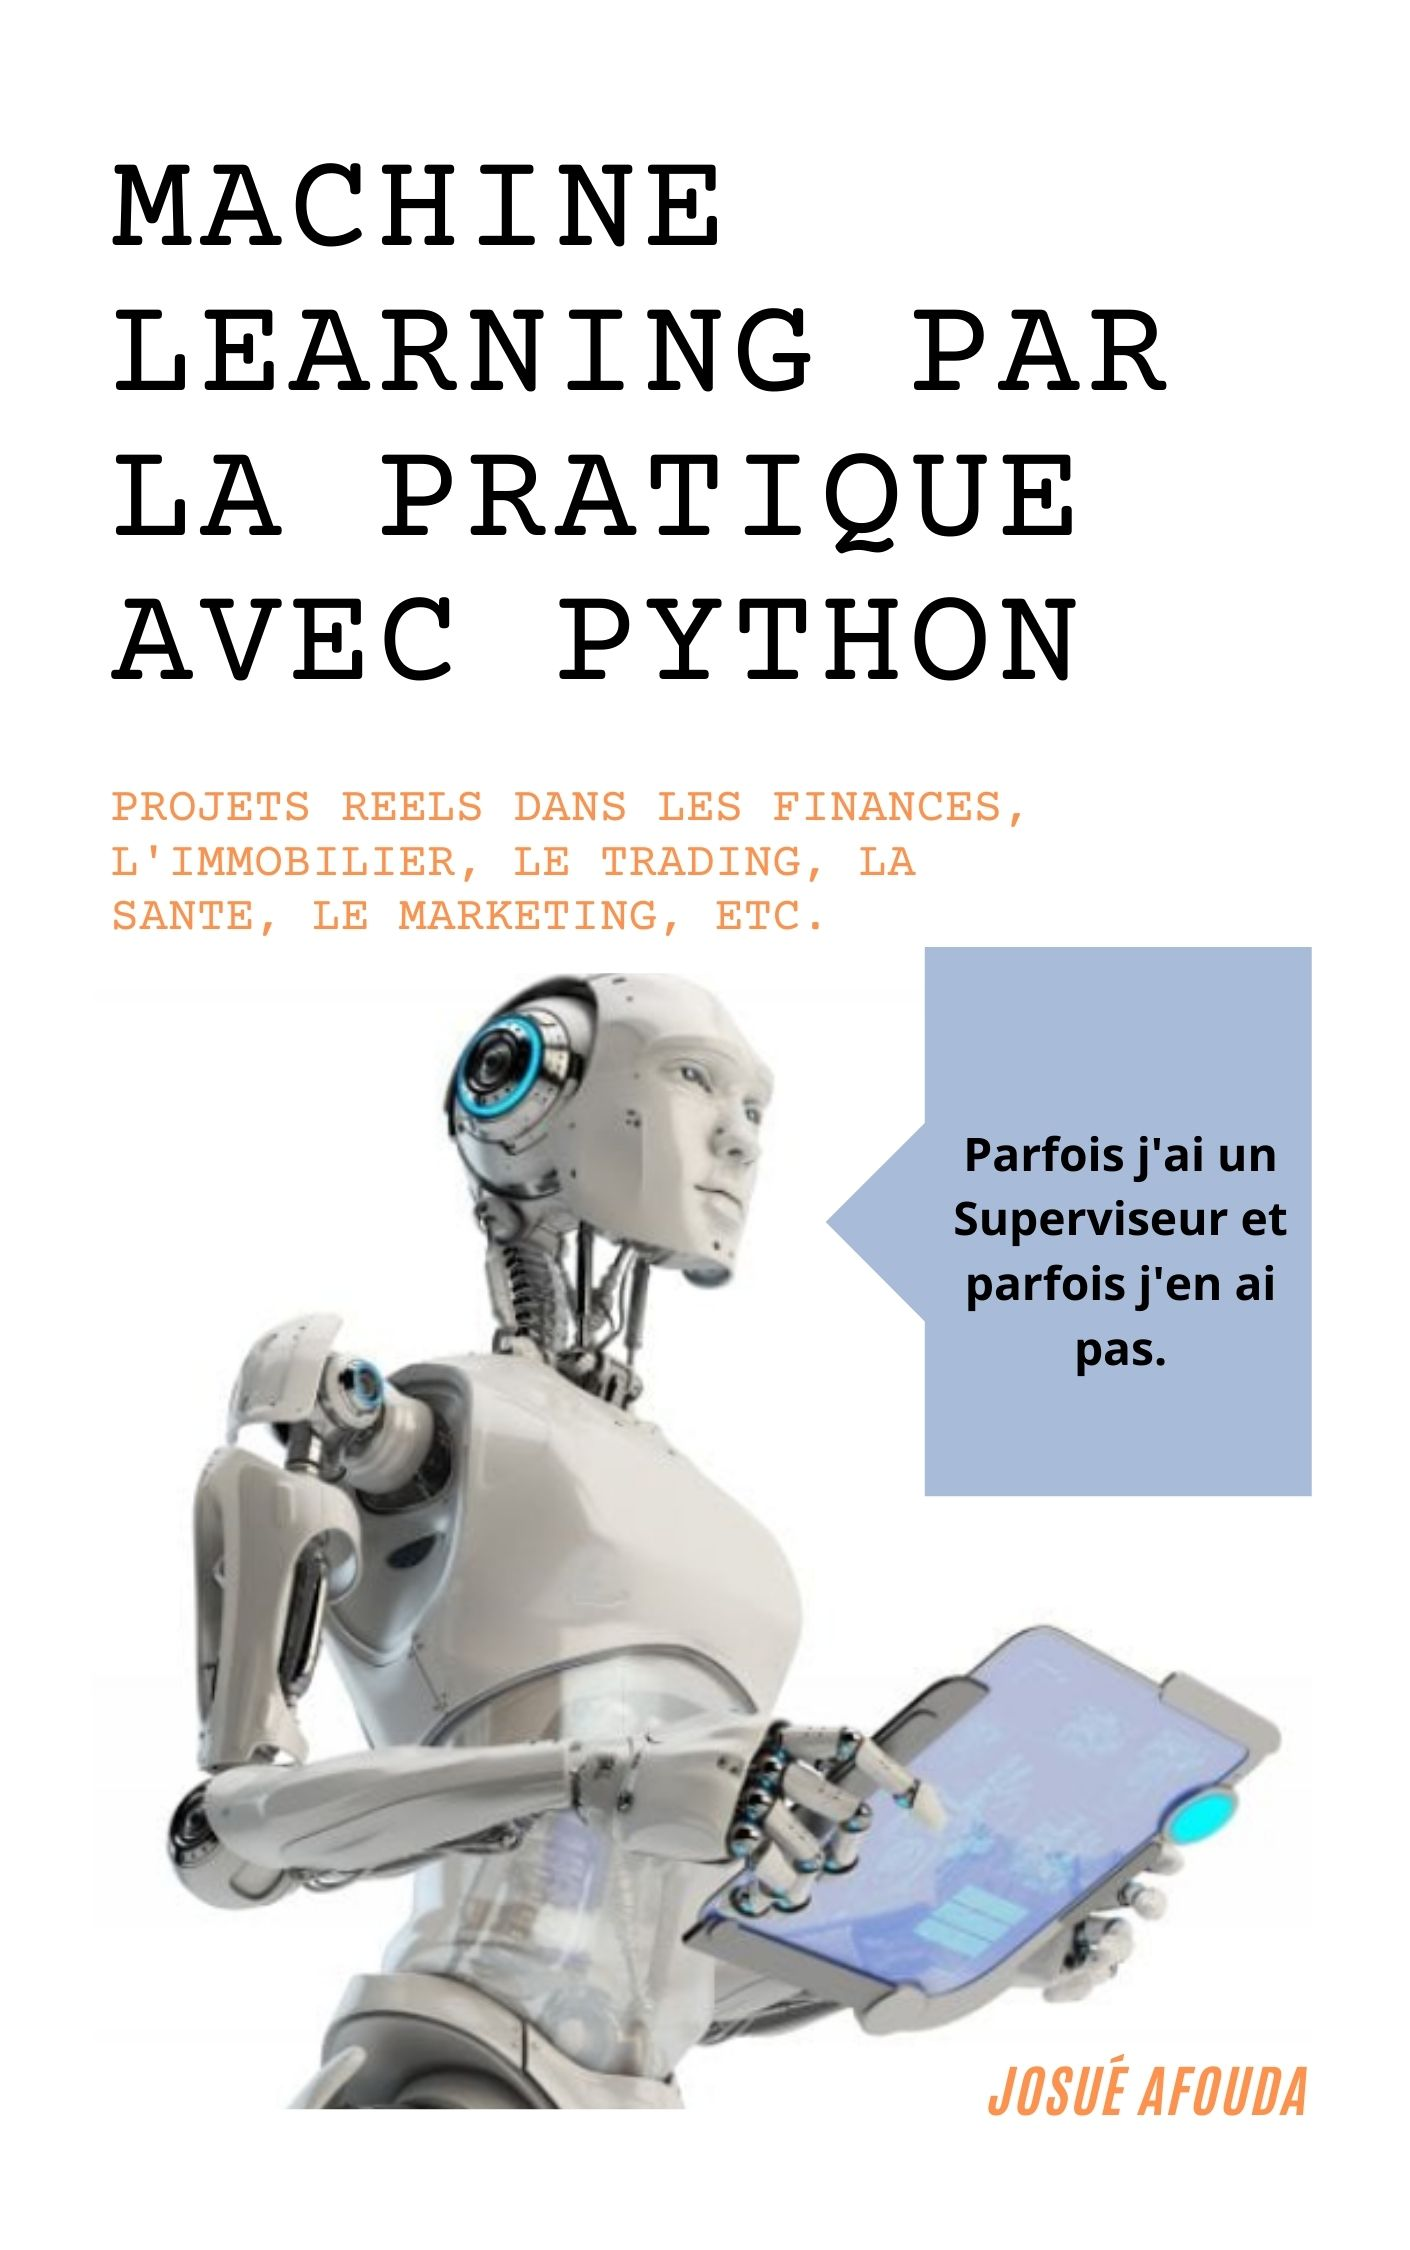

A travers ce livre, vous apprendrez à :

✅ Nettoyer un jeu de données et la rendre prête pour la modélisation (Traitement des valeurs manquantes, Détection et suppression des outliers, Encodage des variables catégorielles, Normalisation des données, etc.) ;

✅ Construire un modèle de classification (LogisticRegression, RandomForestClassifier, DecisionTreeClassifier, KNeighborsClassifier, etc.) et d'un modèle de régression (LinearRegression, RandomForestRegressor, DecisionTreeRegressor, KNeighborsRegressor, etc.) ;

✅ Evaluer la performance d’un modèle (Données d’entraînement et d’évaluation, Choix de la métrique, Validation croisée, Robustesse du modèle, etc.)

✅ effectuer des prédictions ;

✅ modéliser des séries temporelles et effectuer des prévisions ;

✅ rechercher les hyperparamètres optimaux d'un modèle en utilisant les méthodes Grid Search et Random Search ;

✅ automatiser la sélection du meilleur modèle avec l'outil TPOT ;

✅ automatiser le flux de travail de vos projets de Machine Learning ;

✅ effectuer des segmentations avec des algorithmes comme KMeans ;

✅ réduire la dimension de grand ensembles de données en utilisant l'ACP, ...etc.

Vous pouvez aussi regarder ma vidéo YouTube [Comment construire un modèle de Machine Learning avec Python et Scikit-Learn | Tutoriel complet](https://youtu.be/idPDzWybHMw)

In [31]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/idPDzWybHMw" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

C:\Users\josue\anaconda3\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [32]:
# Mon site web
HTML('<iframe src="https://afouda-datascience.com/" width="1200" height="1000"></iframe>')

A bientôt pour de nouveaux contenus édifiants en Data Science. 

[Josué AFOUDA](https://www.amazon.fr/Josu%C3%A9-AFOUDA/e/B08F17S1V8/ref=dp_byline_cont_pop_ebooks_1)

- Mon site web : https://afouda-datascience.com/

- Ma chaîne YouTube : https://www.youtube.com/channel/UCpd56FfjlkKbkHlbgY6XE3w
